In [1]:
import seawater
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
from matplotlib.patches import Arc, FancyArrowPatch


/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_63783/1260822345.py:1: UserWarning: The seawater library is deprecated! Please use gsw instead.
  import seawater


In [2]:
alpha = seawater.alpha(35, 15, 0)
print(alpha)
beta = seawater.beta(35, 15, 0)
print(beta)
K = seawater.seck(35, 15, 0)
print(1/K/10)

0.00021477065585087253
0.0007513612029562356
4.325713462493273e-06


In [35]:
seawater.dens(35, 15, 0)

np.float64(1025.9719628939517)

<>:73: SyntaxWarning: invalid escape sequence '\O'
<>:73: SyntaxWarning: invalid escape sequence '\O'
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_75169/3028607491.py:73: SyntaxWarning: invalid escape sequence '\O'
  ax.text(0.1, 0.1, '$\Omega$', color='0.5', fontsize='large', ha='left', va='center')


0 1
C1
50 2
C2
100 3
C3
150 4
C4
200 0
C0
250 1
C1
300 2
C2
350 3
C3
400 4
C4
450 0
C0


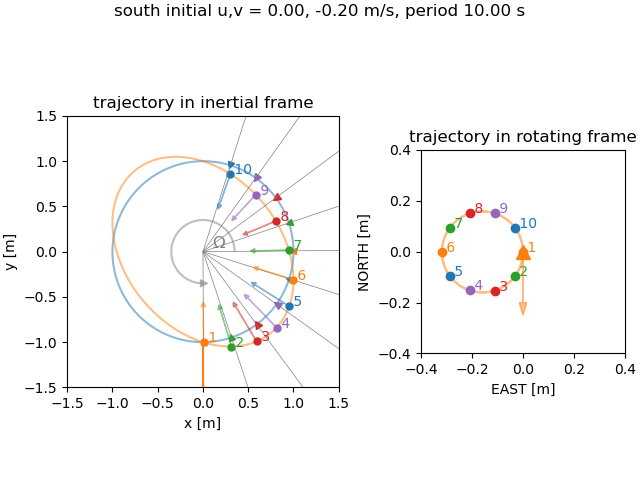

In [3]:
T = 10
om = 2*np.pi / T
dt = 0.01
t = np.arange(0, 10, dt)

x = np.array([0, -1])  # start at the bottom of the circle
r = np.sqrt(x[0]**2 + x[1]**2)

u = np.array([om * r, 0])  # initial velocity, tangential to the circle
xx = np.zeros((len(t), 2))
for nn in range(len(t)):
    r = np.sqrt(x[0]**2 + x[1]**2)
    theta = np.arctan2(x[1], x[0])  # angle in radians

    u = u - dt * om**2 * r *np.array([np.cos(theta), np.sin(theta)])
    x = x + dt * u
    xx[nn,:] = x

x = np.array([0, -1])  # start at the top of the circle
r = np.sqrt(x[0]**2 + x[1]**2)
dir = 'south'
u = np.array([om * r , -0.2])  # initial velocity, tangential to the circle
u0 = u.copy()
u0[0] -=  om * r  # add a small perturbation to the x-component of the velocity
xx2 = np.zeros((len(t), 2))
for nn in range(len(t)):
    r = np.sqrt(x[0]**2 + x[1]**2)
    theta = np.arctan2(x[1], x[0])  # angle in radians
    u = u - dt * om**2 * r *np.array([np.cos(theta), np.sin(theta)])
    x = x + dt * u
    xx2[nn,:] = x

# we are moving in a circle with radius r and angular frequency om
# get r and theta assuming that


from matplotlib.markers import MarkerStyle
from matplotlib.transforms import Affine2D

fig, axs = plt.subplots(1, 2, width_ratios=(1, 0.75), layout='constrained')
ax = axs[0]
ax.plot(xx[:, 0], xx[:, 1], alpha=0.5, zorder=-10, label='trajectory')
ax.plot(xx2[:, 0], xx2[:, 1], alpha=0.5, zorder=-10, label='trajectory with initial velocity')
mm = 0
ind = 0
for nn in range(0, int(5/dt), 50):
    ind += 1
    mm = (mm+1) % 5
    print(nn, mm)
    print(f'C{mm}')
    angle = t[nn] * om *180 / np.pi
    tran = Affine2D().rotate_deg(angle)
    ax.plot(xx[nn, 0], xx[nn, 1], marker=MarkerStyle('^', transform=tran), markersize=5, label='every 30th point', color=f'C{mm}', markerfacecolor=f'C{mm}')
    ax.plot(xx2[nn, 0], xx2[nn, 1], marker=MarkerStyle('o', transform=tran), markersize=5,
    markerfacecolor=f'C{mm}', markeredgecolor=f'C{mm}')
    ax.text(xx2[nn, 0], xx2[nn, 1], f' {ind:1.0f}', color=f'C{mm}')

    # draw a thin grey line from xx towards the origin and away
    ax.plot([0, 2*xx[nn, 0]], [0, 2*xx[nn, 1]], color='grey', linewidth=0.5)
    # lets draw an arrow proportional to the acceleration the particle experiences
    ax.arrow(xx2[nn, 0], xx2[nn, 1], -xx2[nn, 0]*om**2*dt*100, -xx2[nn, 1]*om**2*dt*100,
             head_width=0.05, head_length=0.05, fc=f'C{mm}', ec=f'C{mm}', zorder=10, alpha=0.5,)
    # initial velocity
    ax.arrow(0, -1, u0[0]*3, u0[1]*3, head_width=0.06, head_length=0.1, fc='C1', ec='C1',
         zorder=10, alpha=0.5)

# draw an arc from 0 to 270:
arc = Arc((0, 0), 0.7, 0.7, angle=0, theta1=0, theta2=270, color='0.5', lw=1.5, alpha=0.5)
ax.add_patch(arc)
# draw an arrow head at 0, -0.7
arrow = FancyArrowPatch((0, -0.35), (0.05, -0.35), mutation_scale=10, color='0.5', alpha=0.5)
ax.add_patch(arrow)
ax.text(0.1, 0.1, '$\Omega$', color='0.5', fontsize='large', ha='left', va='center')


ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
# rotate each vector by \omega t
dx = xx2 - xx
ax.set_aspect('equal')
dxr = dx[:, 0] * np.cos(om * t) + dx[:, 1] * np.sin(om * t)
dyr = -dx[:, 0] * np.sin(om * t) + dx[:, 1] * np.cos(om * t)
ax.set_title('trajectory in inertial frame')
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')

#ax.plot(xr, yr, 'k--', label='rotated')
ax = axs[1]
ax.plot(dxr, dyr, '-', color='C1', alpha=0.5, label='rotated')
mm = 0
ind = 0
# initial velocity arrow
ax.arrow(0, 0, u0[0], u0[1], head_width=0.03, head_length=0.05, fc='C1', ec='C1',
         zorder=10, alpha=0.5)
ax.plot(0, 0, '^', markersize=10, markerfacecolor='C1', markeredgecolor='C1', label='initial position')
for nn in range(int(5/dt), int(10/dt), 50):
    ind += 1
    mm = (mm+1) % 5
    ax.plot(dxr[nn], dyr[nn], 'o', markerfacecolor=f'C{mm}', markeredgecolor=f'C{mm}')
    ax.text(dxr[nn], dyr[nn], f' {ind:1.0f}', color=f'C{mm}')
ax.set_xlim([-0.4, 0.4])
ax.set_ylim([-0.4, 0.4])
ax.set_xlabel('EAST [m]')
ax.set_ylabel('NORTH [m]')


ax.set_aspect('equal')
ax.set_title('trajectory in rotating frame')
fig.suptitle(f'{dir} initial u,v = {u0[0]:.2f}, {u0[1]:.2f} m/s, period {T:.2f} s')
fig.savefig(f'rotating_frame{dir}.svg')


# Make a plot of Sverdrup Transport




<>:6: SyntaxWarning: invalid escape sequence '\ '
<>:10: SyntaxWarning: invalid escape sequence '\i'
<>:6: SyntaxWarning: invalid escape sequence '\ '
<>:10: SyntaxWarning: invalid escape sequence '\i'
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_75169/4224708.py:6: SyntaxWarning: invalid escape sequence '\ '
  axs['wind'].set_xlabel('$\\tau_x^W\ \mathrm{[N/m^2]}$')
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_75169/4224708.py:10: SyntaxWarning: invalid escape sequence '\i'
  axs['transport'].set_xlabel('$\int vh\ \mathrm{d}x\ \ \mathrm{[Sv]}$')


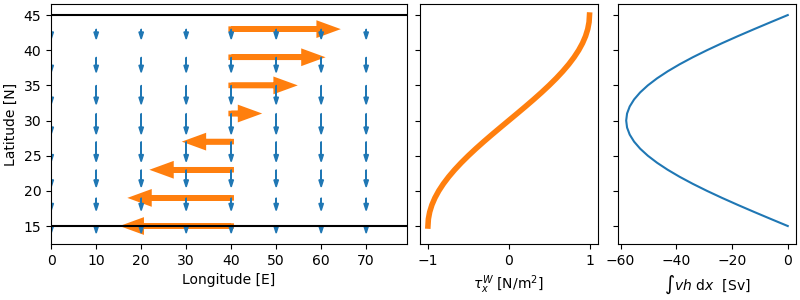

In [4]:
fig, axs = plt.subplot_mosaic([['basin', 'wind', 'transport']], width_ratios=[1, 0.5, 0.5], figsize=(8,3), sharey=True, layout='constrained')
y = np.arange(15, 45.1)
x = np.arange(0, 80, 1)
taux = np.sin(np.pi*2*(y-30)/60)
axs['wind'].plot(taux, y, color='C1', linewidth=4, label='wind stress')
axs['wind'].set_xlabel('$\\tau_x^W\ \mathrm{[N/m^2]}$')
axs['basin'].set_ylabel('Latitude [N]')
vh = -58 * np.cos(np.pi*2*(y-30)/60)
axs['transport'].plot(vh, y, label='Sverdrup transport')
axs['transport'].set_xlabel('$\int vh\ \mathrm{d}x\ \ \mathrm{[Sv]}$')
# plot arrows showing the wind stress.
axs['basin'].set_xlim(x[0], x[-1])
for ind in range(0, 32, 4):
    axs['basin'].arrow(40, y[ind], taux[ind]*20, 0, head_width=1.4, head_length=3, fc='C1', ec='C1', linewidth=4)
    for indx in range(0, 80, 10):
        axs['basin'].arrow(x[indx], y[ind], 0, vh[ind]/30, head_width=1, head_length=1, fc='C0', ec='C0', linewidth=1)
axs['basin'].set_xlabel('Longitude [E]')
#axs['basin'].set_ylim(15, 45)
axs['basin'].axhline(15, color='k')
axs['basin'].axhline(45, color='k')
fig.savefig('imgs/S03_sverdrup_transport.svg')

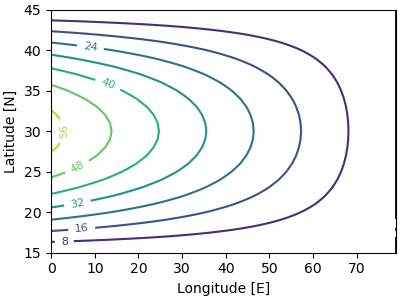

In [24]:
psi = -vh[:, np.newaxis] * (x[-1]-x)[np.newaxis, :] * 110e3/np.cos(30*np.pi/180)/10
fig, ax = plt.subplots(figsize=(4, 3), layout='constrained')
cb = ax.contour(x, y, psi/1e6)
ax.clabel(cb, inline=True, fontsize=8, fmt='%1.0f')
fig.savefig('imgs/S03_sverdrup_transport_contour.svg')
ax.set_ylabel('Latitude [N]')
ax.set_xlabel('Longitude [E]')
fig.savefig('imgs/S03_sverdrup_transport_contour.svg')



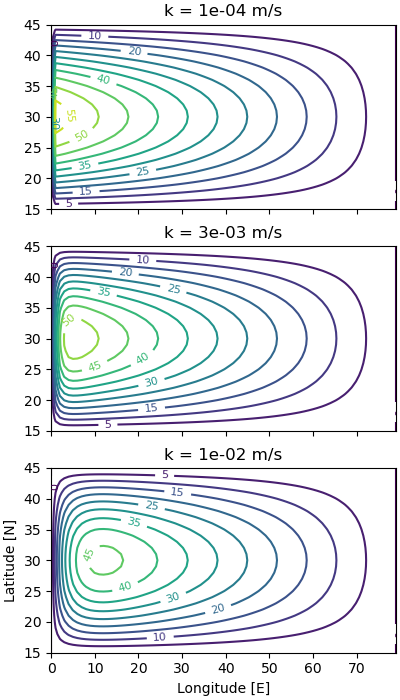

In [80]:
beta = 2e-11
h = 1000
fig, axs = plt.subplots(3, 1, figsize=(4, 7), layout='constrained', sharex=True, sharey=True)
for nn, k in enumerate([1e-4, 3.2e-3, 1e-2]):
    ax = axs[nn]
    L = 110e3 * x[-1] / np.cos(30*np.pi/180)
    L = x[-1]
    xx = x* 110e3 / np.cos(30*np.pi/180)  # convert to meters
    psi = -vh[:, np.newaxis] * (xx[-1]*(-np.exp(-beta*h/k*xx)+1)-xx)[np.newaxis, :]*1e6/xx[-1]

    cb = ax.contour(x, y, psi/1e6, levels = np.arange(0, 100, 5), vmin=0, vmax=60)
    ax.clabel(cb, inline=True, fontsize=8, fmt='%1.0f')
    ax.set_title(f'k = {k:.0e} m/s')
ax.set_ylabel('Latitude [N]')
ax.set_xlabel('Longitude [E]')
fig.savefig('imgs/S03_sverdrup_transport_all_contour.svg')



## Hovmoller diagram Waves


<>:20: SyntaxWarning: invalid escape sequence '\e'
<>:21: SyntaxWarning: invalid escape sequence '\e'
<>:20: SyntaxWarning: invalid escape sequence '\e'
<>:21: SyntaxWarning: invalid escape sequence '\e'
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_75169/97947085.py:20: SyntaxWarning: invalid escape sequence '\e'
  axs['time'].set_xlabel('$\eta \ \mathrm{[m]}$')
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_75169/97947085.py:21: SyntaxWarning: invalid escape sequence '\e'
  axs['x'].set_ylabel('$\eta\ \mathrm{[m]}$')


330


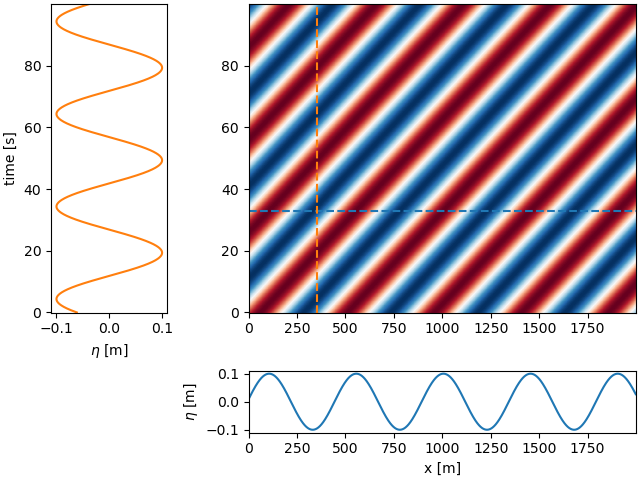

In [119]:
t = np.arange(0, 100, 0.1)
x = np.arange(0, 2000, 1)

X, T = np.meshgrid(x, t)
eta = 0.1 * np.sin(2 * np.pi * (X / 450 - T / 30)+0.72)

fig, axs = plt.subplot_mosaic([['time', 'eta'], ['_', 'x']], width_ratios=[0.3, 1], height_ratios=[1, 0.2], layout='constrained', empty_sentinel='_')
axs['eta'].pcolormesh(X, T, eta, cmap='RdBu_r', shading='auto', rasterized=True)
ind = np.where(t>=33)[0][0]
axs['eta'].axhline(t[ind], color='C0', linestyle='--', label=f't={t[ind]:.1f} s')
print(ind)
axs['x'].plot(x, eta[ind, :], color='C0', label='t=0')
ind = np.where(x>350)[0][0]
axs['eta'].axvline(x[ind], color='C1', linestyle='--', label=f'x={x[ind]:.1f} m')
axs['time'].plot(eta[:, ind], t, color='C1', label='x=0')
axs['time'].sharey(axs['eta'])
axs['x'].sharex(axs['eta'])
axs['x'].set_xlabel('x [m]')
axs['time'].set_ylabel('time [s]')
axs['time'].set_xlabel('$\eta \ \mathrm{[m]}$')
axs['x'].set_ylabel('$\eta\ \mathrm{[m]}$')
fig.savefig('imgs/S04_hovmoller.svg')

<>:16: SyntaxWarning: invalid escape sequence '\o'
<>:17: SyntaxWarning: invalid escape sequence '\ '
<>:16: SyntaxWarning: invalid escape sequence '\o'
<>:17: SyntaxWarning: invalid escape sequence '\ '
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_75169/3897107206.py:16: SyntaxWarning: invalid escape sequence '\o'
  ax.set_ylabel('$\omega / f$')
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_75169/3897107206.py:17: SyntaxWarning: invalid escape sequence '\ '
  ax.set_xlabel('$k f\ \left(gH\\right)^{-1/2}$ ')


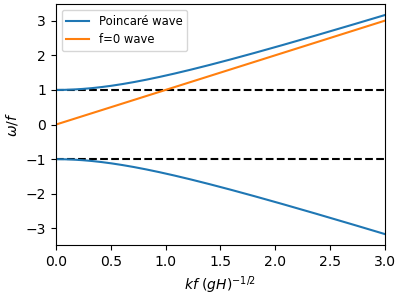

In [158]:
# Poincarre wave

fig, ax = plt.subplots(figsize=(4, 3), layout='constrained')
f = 1e-4  # Coriolis frequency
k0 = np.arange(0, 3, 0.001)# wave number
k = k0*f*np.sqrt(1/g/H)
g = 9.81
H = 1000
omega = np.sqrt(f**2 + g*H*k**2)
omega2 = np.sqrt( g*H*k**2)
ax.axhline(1, color='k', linestyle='--')
ax.axhline(-1, color='k', linestyle='--', label='')
ax.plot(k0, omega/f, label='Poincaré wave', color='C0')
ax.plot(k0, -omega/f, label='', color='C0')
ax.plot(k0, omega2/f, label='f=0 wave', color='C1')
ax.set_ylabel('$\omega / f$')
ax.set_xlabel('$k f\ \left(gH\\right)^{-1/2}$ ')
ax.set_xlim(0, 3)
ax.legend(fontsize='small')

fig.savefig('imgs/S04_poincare_wave.svg')


## Rossby wave dispersion relation

1.118033988749895e-05
1.732050807568877e-05
2.8284271247461906e-05
YEs
2.645751311064591e-05


<>:21: SyntaxWarning: invalid escape sequence '\ '
<>:22: SyntaxWarning: invalid escape sequence '\ '
<>:36: SyntaxWarning: invalid escape sequence '\ '
<>:21: SyntaxWarning: invalid escape sequence '\ '
<>:22: SyntaxWarning: invalid escape sequence '\ '
<>:36: SyntaxWarning: invalid escape sequence '\ '
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_42500/3478486847.py:21: SyntaxWarning: invalid escape sequence '\ '
  ax.set_xlabel('$k\ \mathrm{[rad\,m^{-1}]}$')
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_42500/3478486847.py:22: SyntaxWarning: invalid escape sequence '\ '
  ax.set_ylabel('$l\ \mathrm{[rad\,m^{-1}]}$')
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_42500/3478486847.py:36: SyntaxWarning: invalid escape sequence '\ '
  ax.text(kk-vec[0]*0.7, ll-vec[1]*0.7, '$\ c_g$', fontsize='small', ha='left', va='bottom')


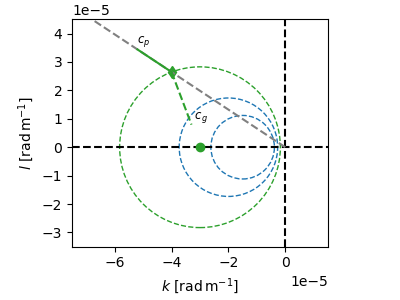

In [51]:
R = 100e3
beta = 2e-11
Rsq = R**2
fig, ax = plt.subplots(figsize=(4, 3), layout='constrained')
for omega0 in [1.5, 2, 3]:
    omega = beta * R / 2 / omega0
    # draw a circle with radius (1/4/omega - 1/Rsq)
    r = np.sqrt(beta**2/(4*omega**2) - 1/Rsq)
    print(r)
    if omega0 < 2.7:
        circle = plt.Circle((-beta/2/omega, 0), r, color='C0', fill=False, linestyle='--', label=f'$\\omega = {omega:.1f}$')
    else:
        print('YEs')
        circle = plt.Circle((-beta/2/omega, 0), r, color='C2', fill=False, linestyle='--', label=f'$\\omega = {omega:.1f}$')
    ax.add_artist(circle)
ax.set_xlim(-1.5/R*5, 0.3/R*5)
ax.set_ylim(-0.7/R*5, 0.9/R*5)
ax.set_aspect('equal')
ax.axvline(0, color='k', linestyle='--')
ax.axhline(0, color='k', linestyle='--')
ax.set_xlabel('$k\ \mathrm{[rad\,m^{-1}]}$')
ax.set_ylabel('$l\ \mathrm{[rad\,m^{-1}]}$')
# draw a line from the outer edge of the circle away from the origin:
kk = -4e-5
ll = np.sqrt(r**2 - (kk+beta/2/omega)**2)
print(ll)
ax.plot(kk, ll, 'd', color='C2')
ax.plot([0, kk*2], [0, ll*2], '--', color='0.5')
ax.plot([kk, kk*1.3], [ll, ll*1.3], color='C2')
ax.text(kk*1.3, ll*1.3, '$c_p$', fontsize='small', ha='left', va='bottom')
# now draw a line from kk, ll to -beta/2/omega, 0
vec = [kk+beta/2/omega, ll]

ax.plot([kk, kk-vec[0]*0.7], [ll, ll-vec[1]*0.7], '--', color='C2')
ax.plot(-beta/2/omega, 0, 'o', color='C2')
ax.text(kk-vec[0]*0.7, ll-vec[1]*0.7, '$\ c_g$', fontsize='small', ha='left', va='bottom')
fig.savefig('imgs/S04_rossby_wave_dispersion.svg')


313.2091952673165
[0.082085   0.10920451 0.14279192 0.18350713 0.2317867  0.28774669
 0.35108996 0.4210297  0.49624177 0.57485743 0.65450541 0.73240716
 0.80552344 0.87074309 0.92509886 0.96598973 0.99138679 1.
 0.99138679 0.96598973 0.92509886 0.87074309 0.80552344 0.73240716
 0.65450541 0.57485743 0.49624177 0.4210297  0.35108996 0.28774669
 0.2317867  0.18350713 0.14279192 0.10920451 0.082085  ]
[1.53780299e-06 1.65386194e-06 1.76550003e-06 1.87255820e-06
 1.97491163e-06 2.07246868e-06 2.16516948e-06 2.25298417e-06
 2.33591094e-06 2.41397381e-06 2.48722038e-06 2.55571940e-06
 2.61955839e-06 2.67884127e-06 2.73368602e-06 2.78422246e-06
 2.83059014e-06 2.87293631e-06 2.91141415e-06 2.94618102e-06
 2.97739693e-06 3.00522323e-06 3.02982132e-06 3.05135162e-06
 3.06997263e-06 3.08584015e-06 3.09910661e-06 3.10992049e-06
 3.11842592e-06 3.12476231e-06 3.12906406e-06 3.13146041e-06
 3.13207527e-06 3.13102719e-06 3.12842933e-06]


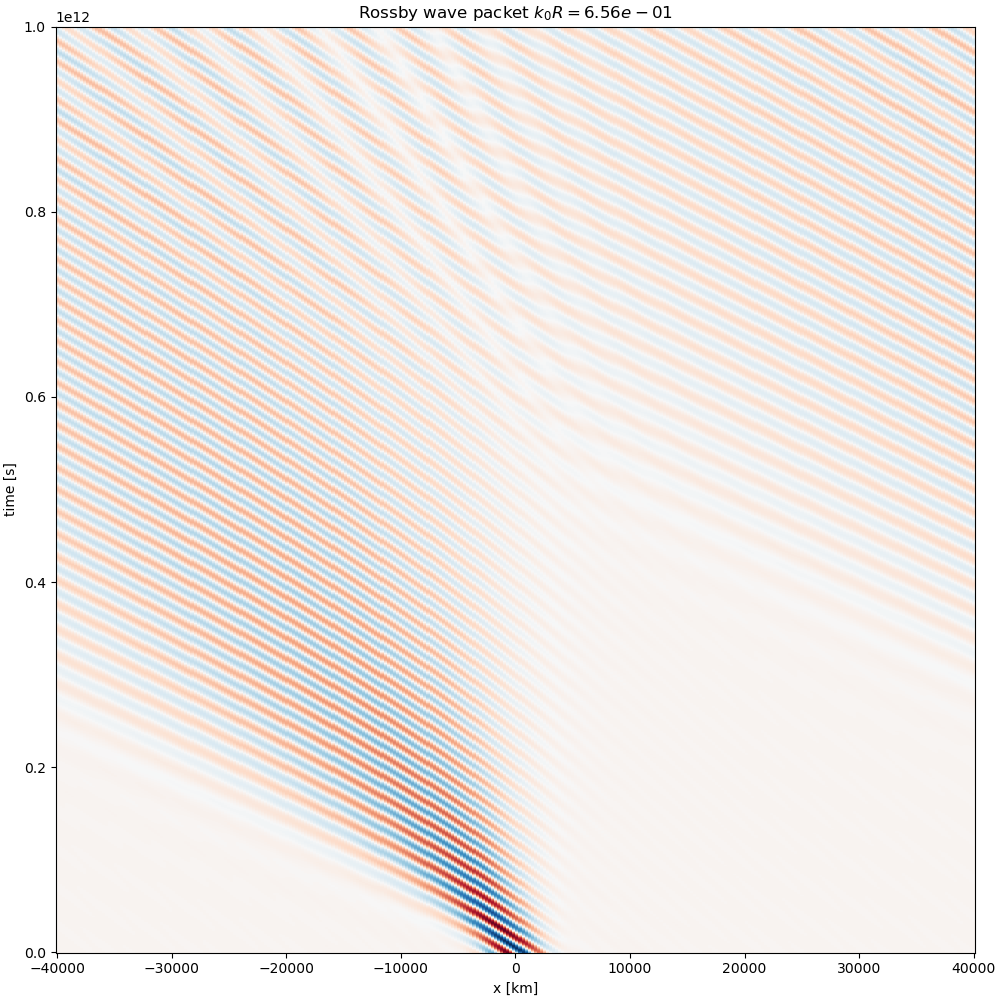

In [ ]:
# lets make hovmoller of Rossby wave packets

N = 17
beta = 2e-11 * 1e3  # 1 / km s
f = 1e-4
g = 9.81
H = 100 # m
R = np.sqrt(g*H)/f / 1000
print(R)
short = False
k0short = np.pi*2/1000

if short:
    k0 = k0short
    #k0 = np.pi*2/3000
    x = np.linspace(-40_000, 40_000, 500)
else:
    k0 = np.pi*2/3000
    #k0 = np.pi*2/3000
    x = np.linspace(-40_000, 40_000, 300)
t = np.linspace(0, 1_000_000_000_000, 3000)

X, T = np.meshgrid(x, t)
shape = np.exp(-np.arange(-N,N+1)**2 / 2 / N**2 * 5)
print(shape)
k = np.arange(-N, N+1) / N / 5 * k0 + k0
k = -k
omega = -beta * R**2 * 1 / (1+R**2 * k**2) * k
print(omega)
eta = np.zeros(X.shape)
for nn in range(len(k)):
    eta += shape[nn] * np.sin(k[nn] * X - omega[nn] * T * f)


fig, ax = plt.subplots(figsize=(10, 10), layout='constrained')
im = ax.pcolormesh(X, T, eta, cmap='RdBu_r', shading='auto', rasterized=True)
ax.set_xlabel('x [km]')
ax.set_ylabel('time [s]')
ax.set_title(f'Rossby wave packet $k_0R = {k0*R:1.2e}$')
if short:
    fig.savefig('imgs/S04_rossby_wave_packetshort.png')
else:
    fig.savefig('imgs/S04_rossby_wave_packetlong.png')





In [136]:
t

array([0.00000000e+00, 3.33444481e+08, 6.66888963e+08, ...,
       9.99333111e+11, 9.99666556e+11, 1.00000000e+12], shape=(3000,))

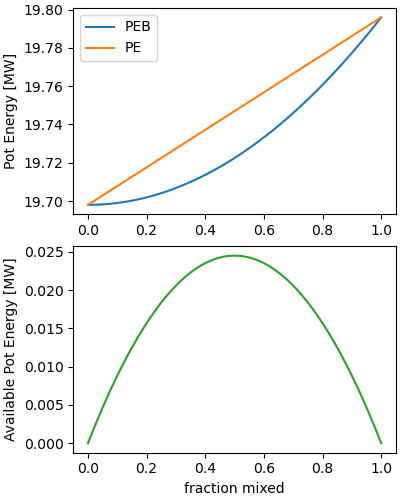

In [19]:
## mixing

fracs = np.arange(0, 1.002, 0.01)
rho1 = 1000
rho2 = 1020

PEB = np.zeros_like(fracs)
PE = np.zeros_like(fracs)

for nn, f in enumerate(fracs):
    PEB[nn] = rho2 * (1-f)**2/2 + (rho1+rho2)/2 *((1+f)**2/2 - (1-f)**2/2) + rho1 * (2-(1+f)**2/2)
    PE[nn] = (1-f) * (rho2*(1/2) + rho1*(3/2)) + f * (rho2+rho1)/2 * 2
g = 9.8
HH = 10**2
W = 10
PEB *= g * HH * W / 1e6
PE *= g * HH * W / 1e6  # convert to MW
fig, axs = plt.subplots(2, 1, figsize=(4, 5), layout='constrained')
ax = axs[0]
ax.plot(fracs, PEB, label='PEB', color='C0')
ax.plot(fracs, PE, label='PE', color='C1')
ax.legend( )
ax.set_ylabel('Pot Energy [MW]')
ax= axs[1]
ax.plot(fracs, PE-PEB, label='APE', color='C2')
ax.set_xlabel('fraction mixed')
ax.set_ylabel('Available Pot Energy [MW]')
fig.savefig('imgs/S05_mixing_potential_energy.svg')


